In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import json, os, glob, re

import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}']

<ipython-input-3-90d0c2353443>:9: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [


## Plots

Change the `link` for the desired data generative link. The options are logit, probit, cauchit, cloglog. 

/Users/smaity/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:2876: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/Users/smaity/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:2876: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/Users/smaity/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:2876: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/Users/smaity/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:2876: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/Users/smaity/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:2876: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
<ipython-input-5-247

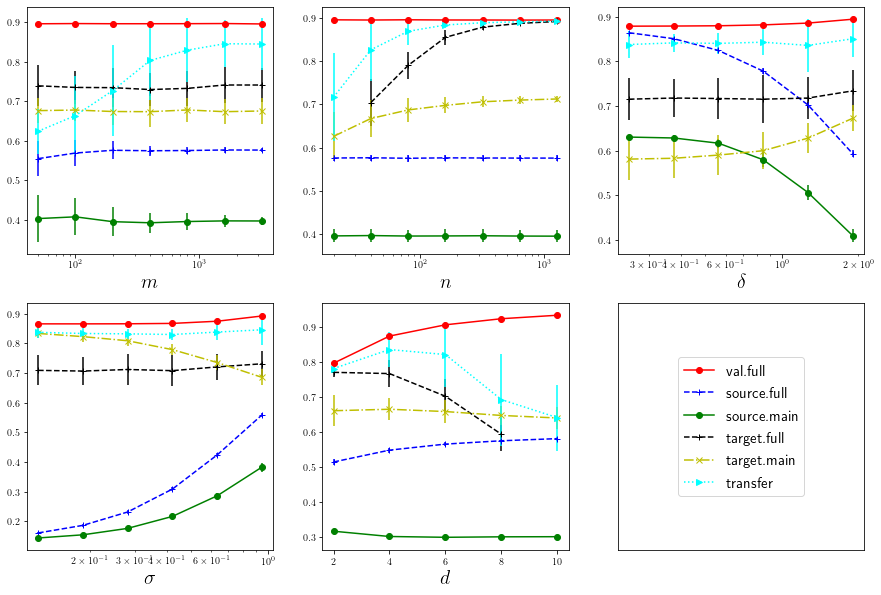

In [5]:
link = 'probit'

with open('summary/summary_'+link+'.json') as f:
    combined = json.load(f)

list_dir = []

for data in combined:
    new_dict = data['par']
    for test in ['source', 'target']:
        for model, accuracy in zip(data['accuracy']['name'], data['accuracy'][test]):
            if accuracy == 'NA':
                accuracy = 'NaN'
            new_dict[(test, model)] = accuracy
            
    list_dir.append(new_dict)    


df = pd.DataFrame(list_dir)

defaults = {'m': 2000, 'n': 50, 'delta': 2.0, 'sigma': 1.0, 'd': 5}
key_labels = ['$m$', '$n$', r'$\delta$', r'$\sigma$', '$d$']
cols = ['r', 'b', 'g', 'k', 'y', 'cyan']
ltys = ['-', '--', '-', '--', '-.', ':']
mks = ['o', '+', 'o', '+', 'x', '>']


fig, ax = plt.subplots(2, 3, figsize = (15, 10))

variables = dict()
for _ in range(len(df.columns)):
    index = df.columns[_]
    if index[0] == 'target':
        variables[index] = ['mean', 'std']
        

        
for i, key, kl in zip(range(6), defaults.keys(), key_labels):
    df_part = df
    for key_default in defaults.keys():
        if key_default != key:
            df_part = df_part.loc[df_part[key_default] == defaults[key_default]]
            
    a = df_part.dtypes == 'object'
    a = list(a.loc[a == True].index)
    for col in a:
        df_part = df_part.astype({col: 'float'})
            
    summary = df_part.groupby([key], as_index=False).agg(variables)
    x = summary[key]
    
    for index, col, lty, mk in zip(variables, cols, ltys, mks):
        mean = summary[index]['mean']
        std = summary[index]['std']
        u = i//3
        v = i%3
        ax[u][v].errorbar(x, mean, std, color = col, linestyle = lty, marker = mk)
        ax[u][v].set_xlabel(kl, fontsize = 20)
        if key != 'd':
            ax[u][v].set_xscale('log')
        
        
        
names = []
lines = []
for index, col, lty, mk in zip(variables, cols, ltys, mks):
    names.append(index[1])
    lines.append(Line2D([0], [0], color = col, linestyle = lty, marker = mk))
    
ax[1][2].legend(lines, names, loc = 'center', fontsize = 15)
ax[1][2].get_xaxis().set_visible(False)
ax[1][2].get_yaxis().set_visible(False)  
fig.savefig('plot/plot_'+ link + '.pdf', bbox_inchs = 'tight')